# Introduction
Contains all analysis to examine and standardise the directionality dynamics of the mtl-traject data

## Plan:
- calculate some circular statistics (see book)
- build an example windrose for a journey for explanation in the methodology
- difference in resultant
- dynamic directional LISAs (from pysal; Isotropy and Anisotropy)

## Class & Routine structure:
- will be stored in the utils/direction_functions.py

#### References:
- https://nbviewer.jupyter.org/github/pysal/giddy/blob/master/notebooks/directional.ipynb

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import shapely
import shapely.wkt
import pysal as ps
import libpysal 
import numpy as np
import windrose
from matplotlib import cm

sys.path.append('../utils')
import direction_functions

%matplotlib inline

/Applications/anaconda/envs/st-ds/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql
/Applications/anaconda/envs/st-ds/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/Applications/anaconda/envs/st-ds/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/Applications/anaconda/envs/st-ds/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() 

In [2]:
gdf = gpd.read_file("../app_route_data/trajets_mtl_trajet_2017.shp", encoding='utf-8') # utf-8 needed to read french letters
mtl_regions = gpd.read_file("../shapes/mtl_all_regions.json")
mtl_dissem = gpd.read_file("../shapes/mtl_dissem.geojson")

In [ ]:
# outlier removal
gdf = gdf.loc[gdf.distance_m >= 50]
gdf = gdf.loc[gdf.seconds >= 60]
gdf = gdf.loc[gdf.distance_m <= 100000]
gdf = gdf.loc[gdf.seconds <= 10800]

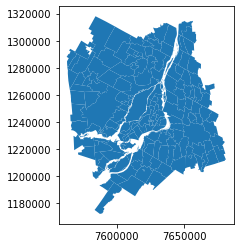

In [83]:
mtl_regions.plot()

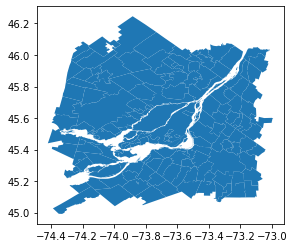

In [74]:
mtl_outside_regions.plot()

In [79]:
mtl_outside_regions.overlaps(mtl_regions)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
156    False
157    False
158    False
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166    False
167    False
168    False
169    False
Length: 170, dtype: bool

In [84]:
gdf.head()

,id_trip,mode,purpose,starttime,endtime,seconds,distance_m,direction,magnitude,geometry
0,1547,None,None,2017-09-18 04:16:58UTC,2017-09-18 04:26:26UTC,568,1530.222174,303.572980,0.019003,LINESTRING (-73.65116600000005 45.544500999999...
1,308312,None,None,2017-09-18 06:17:46UTC,2017-09-18 06:58:49UTC,2463,324.869460,274.079216,0.313505,LINESTRING (-73.65098700000003 45.544495999999...
2,384772,None,None,2017-09-18 09:30:24UTC,2017-09-18 10:17:28UTC,2824,32009.701647,130.691098,0.272104,(LINESTRING (-73.83286900000006 45.63606799999...
3,150744,car,pick_up_a_person,2017-09-18 10:02:50UTC,2017-09-18 10:17:12UTC,862,9935.922336,85.310969,0.304086,LINESTRING (-73.64638500000002 45.546289999999...
4,199011,None,None,2017-09-18 10:18:40UTC,2017-09-18 10:27:44UTC,544,563.806088,96.630699,0.255485,(LINESTRING (-73.74549500000005 45.55838999999...


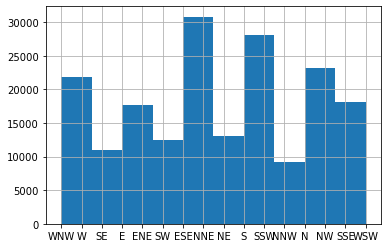

In [51]:
gdf.carddir.hist()

In [14]:
bearing = direction_functions.calculate_initial_compass_bearing((-73.65116600000005, 45.54450099999993), (-73.65122700000005, 45.5445189999999))
magnitude = direction_functions.calc_magnitude((-73.65116600000005, 45.54450099999993), (-73.65122700000005, 45.5445189999999))

In [20]:
bearing

292.84727134789154

In [19]:
gdf.magnitude.to_numpy(),gdf.direction.to_numpy()

(array([0.01900323, 0.31350463, 0.27210368, ..., 0.03124955, 0.47560548,
        0.02000001]),
 array([303.57297974, 274.07921592, 130.69109771, ...,  49.18028164,
         33.84412198, 303.0797187 ]))

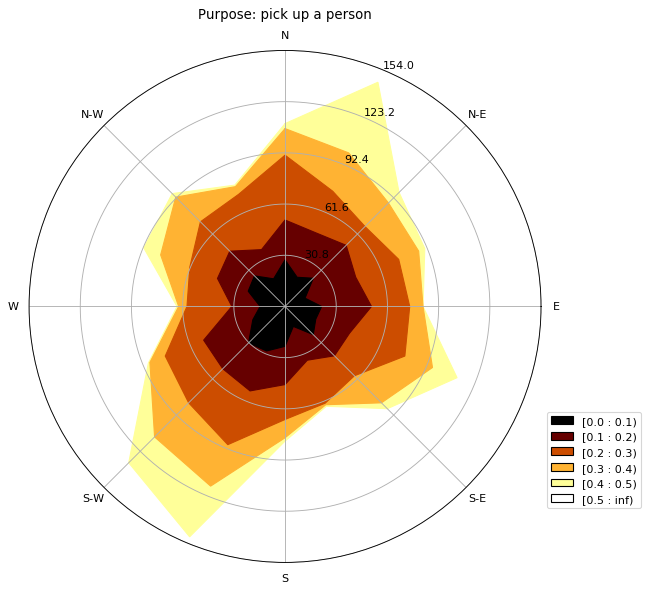

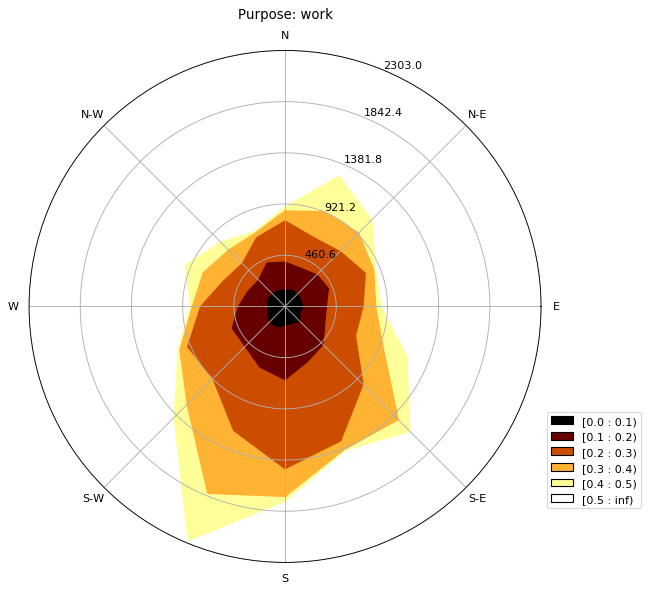

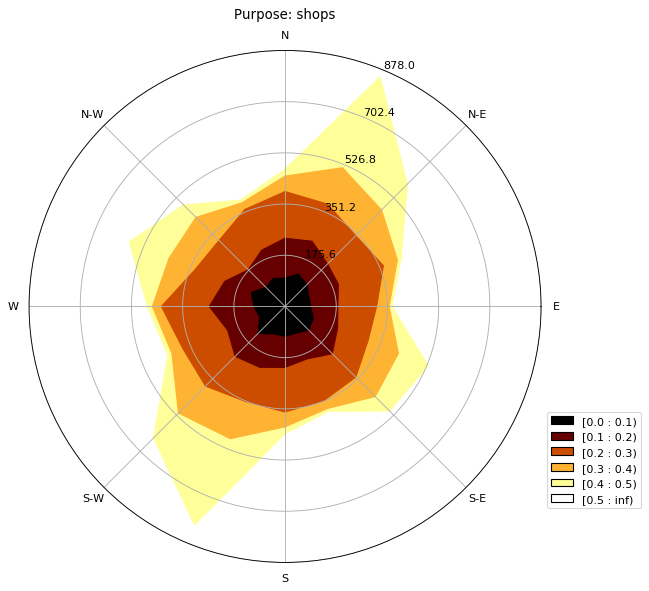

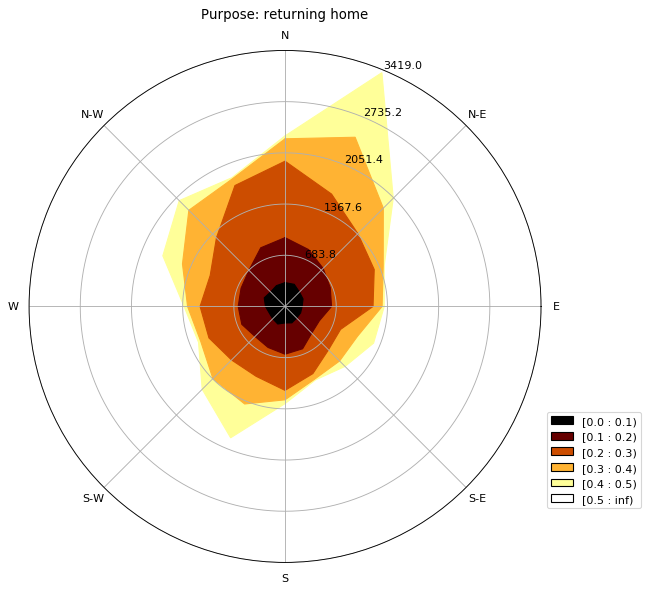

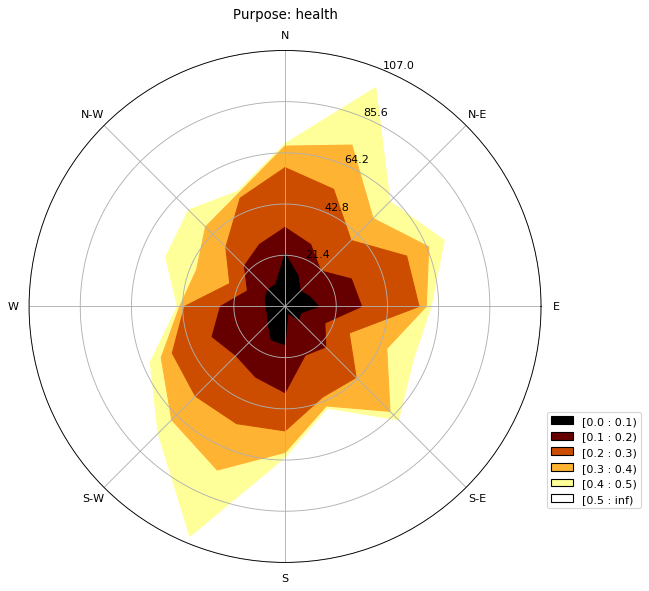

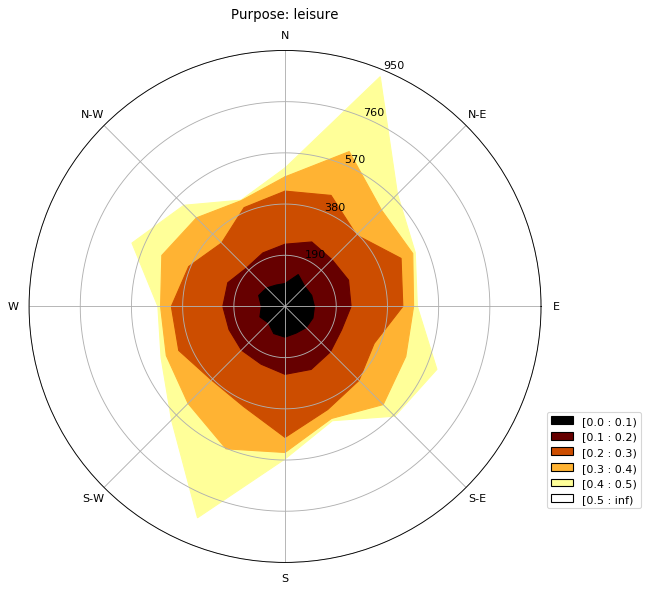

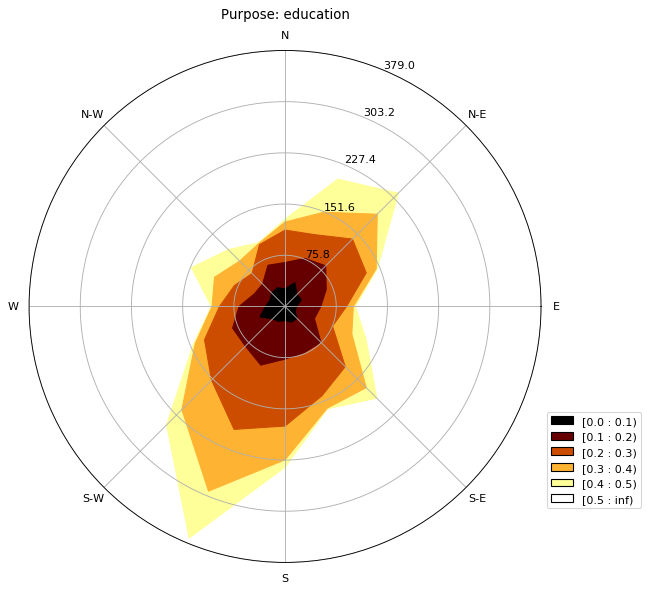

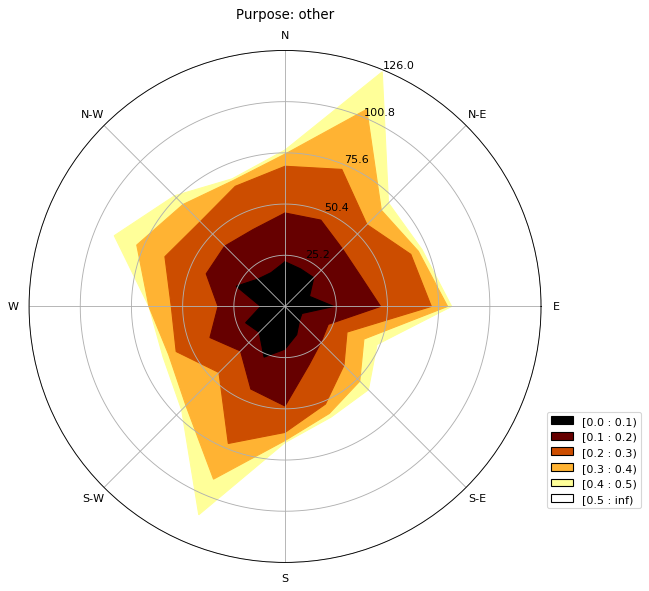

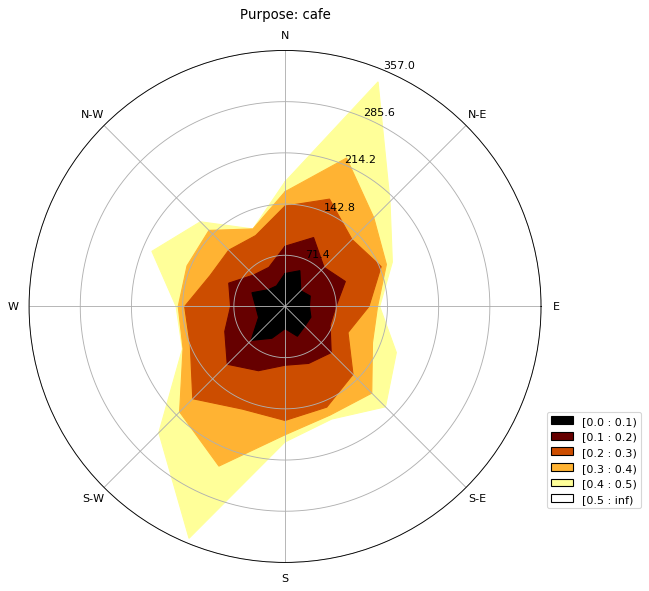

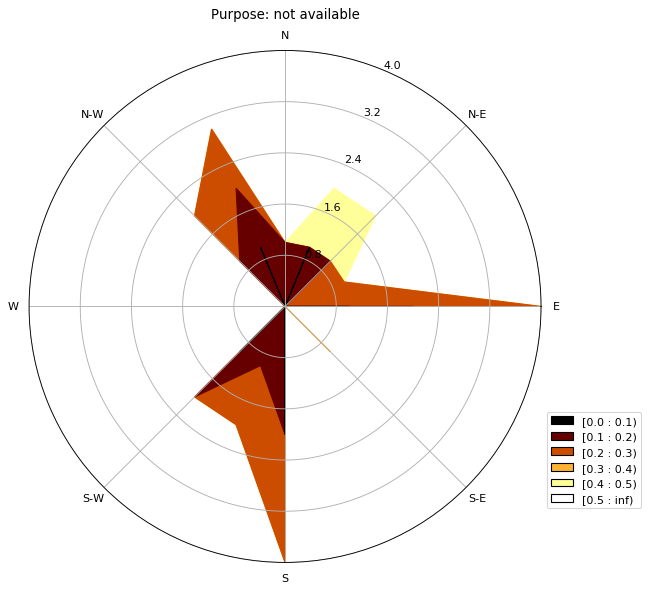

In [18]:
for pur in gdf.purpose.unique():
#     pur = 'cafe'
    data = gdf.loc[gdf.purpose == pur]
    try:
        max_mag = max(data.magnitude)
    except:
        continue

    ax_cont = windrose.WindroseAxes.from_ax()
    ax_cont.contourf(data.direction.to_numpy(),data.magnitude.to_numpy(),cmap=cm.afmhot)
    ax_cont.set_legend()
    ax_cont.legend(loc=6, bbox_to_anchor=(1.0,0.2))

    plt.title("Purpose: " + pur.replace("_"," "))
#     ax_bar = windrose.WindroseAxes.from_ax()
#     ax_bar.bar(data.direction.to_numpy(),data.magnitude.to_numpy(), bins=np.arange(0, max_mag, (max_mag/10)), cmap=cm.afmhot)
#     ax_bar.set_legend()
#     ax_bar.legend(loc=6, bbox_to_anchor=(1.0,0.2))
#     plt.title(pur)
#     plt.savefig("figures/{0}_contour_direction.png".format(pur), bbox_inches='tight')
    plt.show()

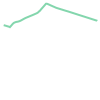

In [15]:
gdf.geometry[3]

## directional LISA

In [77]:
f = open(libpysal.examples.get_path('spi_download.csv'), 'r')
lines = f.readlines()
f.close()

In [43]:
lines = [line.strip().split(",") for line in lines]
names = [line[2] for line in lines[1:-5]]
data = np.array([list(map(int, line[3:])) for line in lines[1:-5]])

In [85]:
len(names)

60

In [86]:
names

['"United States 3/"',
 '"Alabama"',
 '"Alaska 3/"',
 '"Arizona"',
 '"Arkansas"',
 '"California"',
 '"Colorado"',
 '"Connecticut"',
 '"Delaware"',
 '"District of Columbia"',
 '"Florida"',
 '"Georgia"',
 '"Hawaii 3/"',
 '"Idaho"',
 '"Illinois"',
 '"Indiana"',
 '"Iowa"',
 '"Kansas"',
 '"Kentucky"',
 '"Louisiana"',
 '"Maine"',
 '"Maryland"',
 '"Massachusetts"',
 '"Michigan"',
 '"Minnesota"',
 '"Mississippi"',
 '"Missouri"',
 '"Montana"',
 '"Nebraska"',
 '"Nevada"',
 '"New Hampshire"',
 '"New Jersey"',
 '"New Mexico"',
 '"New York"',
 '"North Carolina"',
 '"North Dakota"',
 '"Ohio"',
 '"Oklahoma"',
 '"Oregon"',
 '"Pennsylvania"',
 '"Rhode Island"',
 '"South Carolina"',
 '"South Dakota"',
 '"Tennessee"',
 '"Texas"',
 '"Utah"',
 '"Vermont"',
 '"Virginia"',
 '"Washington"',
 '"West Virginia"',
 '"Wisconsin"',
 '"Wyoming"',
 '"New England"',
 '"Mideast"',
 '"Great Lakes"',
 '"Plains"',
 '"Southeast"',
 '"Southwest"',
 '"Rocky Mountain"',
 '"Far West 3/"']

In [75]:
data.shape # 60 names (states) for 40 years

(60, 40)

In [87]:
sids  = list(range(60))
out = ['"United States 3/"',
      '"Alaska 3/"',
      '"District of Columbia"',
      '"Hawaii 3/"',
      '"New England"','"Mideast"',
       '"Great Lakes"',
       '"Plains"',
       '"Southeast"',
       '"Southwest"',
       '"Rocky Mountain"',
       '"Far West 3/"']


In [88]:
snames = [name for name in names if name not in out]

In [89]:
sids = [names.index(name) for name in snames]

In [90]:
states = data[sids,:] # only states
us = data[0] # national averages
years = np.arange(1969, 2009)

In [91]:
## relative to national average
rel = states/(us*1.) 

In [97]:
# Create our contiguity matrix from an external GAL file and row standardize the resulting weights
gal = libpysal.io.open(libpysal.examples.get_path('states48.gal'))
w = gal.read()
w.transform = 'r'

In [101]:
len(w.weights) # 48 states

48

In [107]:
rel.shape

(48, 40)

In [102]:
# Take the first and last year of our income data as the interval to do the directional directional analysis
Y = rel[:, [0, -1]] 

In [103]:
Y.shape

(48, 2)

In [104]:
Y

array([[0.71272158, 0.83983287],
       [0.91110532, 0.85393454],
       [0.68196038, 0.80573518],
       [1.181439  , 1.08538102],
       [0.96115746, 1.06906586],
       [1.25677789, 1.39952248],
       [1.14859228, 1.00773478],
       [0.9535975 , 0.9765967 ],
       [0.82090719, 0.86781238],
       [0.85088634, 0.82257262],
       [1.12956204, 1.05319837],
       [0.9624609 , 0.86064962],
       [0.95542231, 0.93021289],
       [0.92674661, 0.96547951],
       [0.77267987, 0.79775169],
       [0.75234619, 0.90588938],
       [0.81803962, 0.90671011],
       [1.09462982, 1.20319339],
       [1.09098019, 1.27472145],
       [1.08107404, 0.86920513],
       [0.98409802, 1.07035913],
       [0.62643379, 0.75604357],
       [0.93039625, 0.9110376 ],
       [0.85870699, 0.86161958],
       [0.93091762, 0.97368683],
       [1.18091762, 1.02422404],
       [0.97627737, 1.08493335],
       [1.17309698, 1.277308  ],
       [0.76120959, 0.83142658],
       [1.19212722, 1.2125199 ],
       [0.

In [73]:
np.random.seed(100)
r4 = ps.explore.giddy.directional.Rose(Y, w, k=10) 
# Y = 48 US states 1969 and 2009 standardised to national 
# w = weights of the states contiguity

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x123ae20b8>)

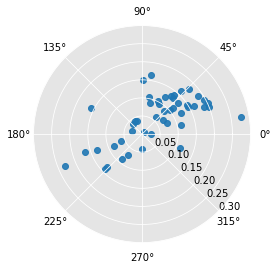

In [74]:
# Call the rose function to construct the directional histogram for the dynamic LISA statistics. We will use four circular sectors for our histogram
r4.plot()

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x1235d7358>)

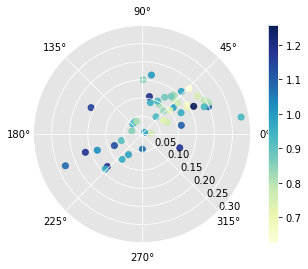

In [26]:
r4.plot(Y[:,0]) # condition on starting relative income

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x123383748>)

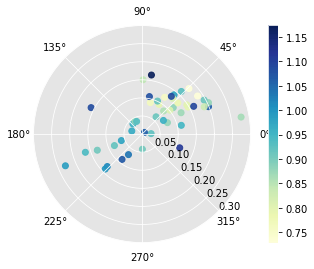

In [27]:
r4.plot(attribute=r4.lag[:,0]) # condition on the spatial lag of starting relative income

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1236c7630>)

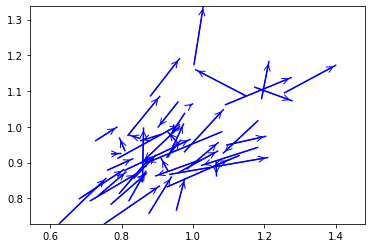

In [28]:
r4.plot_vectors() # lisa vectors #arrows=False

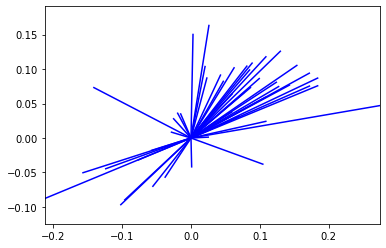

In [30]:
r4.plot_origin() # origin standardized

# Inference
The Rose class contains methods to carry out inference on the circular distribution of the LISA vectors. The first approach is based on a two-sided alternative where the null is that the distribution of the vectors across the segments reflects independence in the movements of the focal unit and its spatial lag. Inference is based on random spatial permutations under the null.

In [31]:
# What are the cut-offs for our histogram - in radians
r4.cuts

array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])

In [32]:
# What are the counts for our histogram - in radians

r4.counts

array([32,  5,  9,  2])

In [33]:
np.random.seed(1234)

In [34]:
r4.permute(permutations=999)

In [35]:
r4.p

array([0.028, 0.   , 0.002, 0.004])



Here all the four sector counts are signficantly different from their expectation under the null.

A directional test can also be implemented. Here the direction of the departure from the null due to positive co-movement of a focal unit and its spatial lag over the time period results in two two general cases. For sectors in the positive quadrants (I and III), the observed counts are considered extreme if they are larger than expectation, while for the negative quadrants (II, IV) the observed counts are considered extreme if they are small than the expected counts under the null.


In [144]:
r4.permute(alternative='positive', permutations=999)
r4.p

ValueError: operands could not be broadcast together with shapes (8,) (10,) 

In [37]:
r4.expected_perm

array([27.24824825, 11.56556557,  2.43443443,  6.75175175])

Finally, a directional alternative reflecting negative association between the movement of the focal unit and its lag has the complimentary interpretation to the positive alternative: lower counts in I and III, and higher counts in II and IV relative to the null.

In [38]:
r4.permute(alternative='negative', permutations=999)
r4.p

array([0.996, 1.   , 1.   , 0.996])

In [119]:
## repeat with 8 instead
r8 = ps.explore.giddy.directional.Rose(Y, w, k=8)

In [129]:
r8.counts

array([19, 13,  3,  2,  7,  2,  1,  1])

In [128]:
r8.permute() # change each time
r8.p

array([0.86, 0.08, 0.06, 0.  , 0.04, 0.18, 0.54, 0.02])

The default is a two-sided alternative.
There is an option for a directional alternative reflecting positive co-movement
of the focal series with its spatial lag. In this case the number of vectors in quadrants I and III
should be much larger than expected, while the counts of vectors falling in quadrants II and IV
should be much lower than expected.


In [131]:
r8.permute(alternative='positive')
r8.p

array([0.4 , 0.05, 0.2 , 0.02, 0.01, 0.1 , 0.73, 0.01])

In [132]:
r8.permute(alternative='negative')
r8.p

array([0.76, 1.  , 0.96, 0.99, 1.  , 0.99, 0.76, 1.  ])

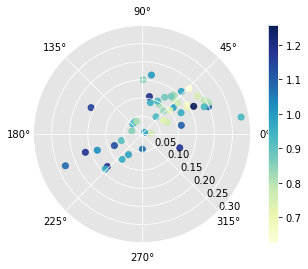

In [134]:
fig1, _ = r8.plot(attribute=Y[:,0])
plt.show(fig1)

## directionality across Montreal

In [109]:
# convert the point columns back into a Point class
gdf['start_wgs'] = gdf['start_wgs'].apply(shapely.wkt.loads)
gdf['start_can'] = gdf['start_can'].apply(shapely.wkt.loads)
gdf['end_wgs'] = gdf['end_wgs'].apply(shapely.wkt.loads)
gdf['end_can'] = gdf['end_can'].apply(shapely.wkt.loads)

In [112]:
dissem_joined = gpd.sjoin(gpd.GeoDataFrame(gdf[gdf.columns[:-1]], geometry='start_can', crs={'init': 'epsg:3347'}), mtl_dissem)
region_joined = gpd.sjoin(gpd.GeoDataFrame(gdf[gdf.columns[:-1]], geometry='start_can', crs={'init': 'epsg:3347'}), mtl_regions)

/Applications/anaconda/envs/st-ds/lib/python3.7/site-packages/geopandas/tools/sjoin.py:56: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:3347'})
  '(%s != %s)' % (left_df.crs, right_df.crs))


In [152]:
all_directions = {}
for u_id in sorted(region_joined.ID.unique()):
    current_df = region_joined.loc[region_joined['ID'] == u_id]
    all_directions[u_id] =  direction_functions.find_resultant(current_df.direction.values, current_df.magnitude.values)
    del current_df

In [208]:
mtl_regions['mean_dir'] = mtl_regions.apply(lambda row: all_directions[row.ID][0] if row.ID in all_directions.keys() else None, axis=1)
mtl_regions['mean_mag'] = mtl_regions.apply(lambda row: all_directions[row.ID][1] if row.ID in all_directions.keys() else None, axis=1)

/Applications/anaconda/envs/st-ds/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


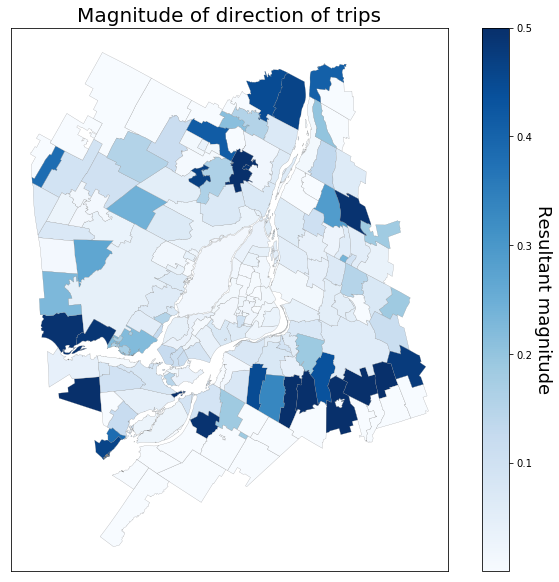

In [271]:
fig, ax = plt.subplots(1, figsize=(12,10))
mtl_regions.plot('mean_mag', cmap='Blues', linewidth=.2, edgecolor='0.5', ax=ax, legend=True)
cax = plt.gcf().axes[1]
cax.set_ylabel('Resultant magnitude', rotation=-90, size=18,labelpad=20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Magnitude of direction of trips", size=20)
# plt.savefig("figures/region_resultant.png", bbox_inches='tight')

In [280]:
mtl_regions.mean_dir[1]

171.47363303007387

In [287]:
direction_functions.cardinal_direction(mtl_regions.mean_dir[2])

'NNE'

In [301]:
a = mtl_regions.mean_dir[0]


True

In [324]:
mtl_regions['mean_card_dir'] =  mtl_regions.mean_dir.apply(lambda row: direction_functions.cardinal_direction(row) if not np.isnan(row) else None)

In [423]:
color_order =  {10: 'S', 3: 'NNE', 9: 'SSE', 11: 'SSW', 2: 'N', 5: 'ENE', 15: 'WNW', 1: 'NNW', 
                14: 'W', 6: 'E', 7: 'ESE', 13: 'WSW', 4: 'NE', 12: 'SW', 0: 'NW', 8: 'SE', None: None}

In [424]:
color_order

{10: 'S',
 3: 'NNE',
 9: 'SSE',
 11: 'SSW',
 2: 'N',
 5: 'ENE',
 15: 'WNW',
 1: 'NNW',
 14: 'W',
 6: 'E',
 7: 'ESE',
 13: 'WSW',
 4: 'NE',
 12: 'SW',
 0: 'NW',
 8: 'SE',
 None: None}

In [434]:
mtl_regions['mean_card_dir_num'] = mtl_regions.mean_card_dir.apply(lambda val: list(color_order.keys())[list(color_order.values()).index(val)])


In [500]:
## function to correct the order of the legend
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if k != None:
                if txt.get_text() == str(float(k)):
                    txt.set_text(v)

In [501]:
# from matplotlib.colors import LinearSegmentedColormap
# cmap = LinearSegmentedColormap.from_list('mycmap', ['#2d31a6', '#1c22d4', '#07e9f5','#07f5c5','green','#8ef507',\
#                                                     'yellow','#f5e907','orange','#f56207','red',\
#                                                     '#ad2723','#8a2525','brown','brown','#4e4478'])

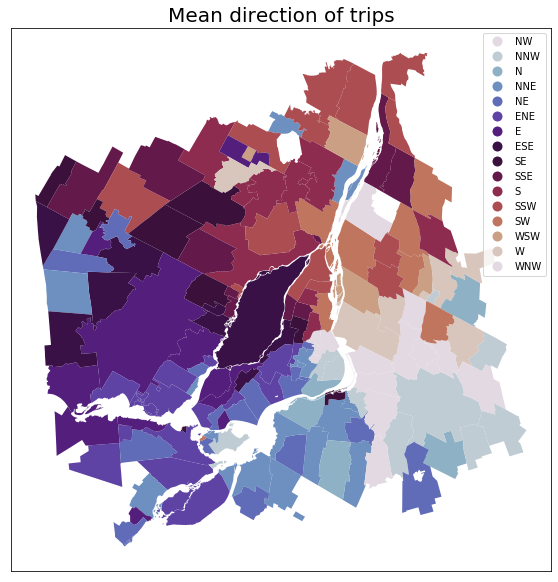

In [506]:
fig, ax = plt.subplots(1, figsize=(12,10))
mtl_regions.dropna(subset=['mean_card_dir_num']).plot('mean_card_dir_num',cmap='twilight', legend=True, categorical=True, ax=ax)
replace_legend_items(ax.get_legend(), color_order)
legend = ax.get_legend()
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title("Mean direction of trips", size=20)
# plt.savefig("figures/region_direction.png", bbox_inches='tight')